In [43]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat
!pip install kaleido

In [23]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [24]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2024--07-25']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-07-25']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [26]:
Tesla = yf.Ticker("TSLA")

In [27]:
def extract_stock_info(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    tesla_data = ticker.history(period="max")
    info = ticker.info
    return tesla_data, info
ticker_symbol = "TSLA"
tesla_data, info = extract_stock_info(ticker_symbol)
print("tesla Data:")
print(tesla_data)

tesla Data:
                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-07-18 00:00:00-04:00  251.089996  257.140015  247.199997  249.229996   
2024-07-19 00:00:00-04:00  247.789993  249.440002  236.830002  239.199997   
2024-07-22 00:00:00-04:00  244.210007  253.210007  243.750000  251.509995   
2024-07-23 00:00:00-04:00  253.600006  255.759995  245.630005  246.380005   
2024-07-24 00:00:00-04:00  225.419998  225.990005  214.710007  2

In [28]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [29]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url)

In [19]:
!pip install html5lib

In [30]:

tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

In [31]:
Tesla_Revenue = pd.read_html(url)
tesla_revenue = Tesla_Revenue[1]
column_names = ["Date", "Revenue"]
tesla_revenue.columns = column_names
print(tesla_revenue.head())
tesla_revenue.isnull()
tesla_revenue.dropna(inplace=True)

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [32]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(int)

In [33]:
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30    21454
1  2022-06-30    16934
2  2022-03-31    18756
3  2021-12-31    17719
4  2021-09-30    13757


In [34]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [35]:
import yfinance as yf
GameStop = yf.Ticker("GME")

In [14]:
def extract_stock_info(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    gme_data = ticker.history(period="max")
    info = ticker.info
    return gme_data, info
ticker_symbol = "GME"
gme_data, info = extract_stock_info(ticker_symbol)
print("gme data:")
print(gme_data)

gme data:
                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620128   1.693349   1.603295   1.691666   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2024-07-18 00:00:00-04:00  27.980000  28.379999  25.610001  25.879999   
2024-07-19 00:00:00-04:00  25.549999  26.389999  24.850000  24.969999   
2024-07-22 00:00:00-04:00  24.840000  25.980000  24.379999  25.219999   
2024-07-23 00:00:00-04:00  25.219999  25.680000  24.889999  25.500000   
2024-07-24 00:00:00-04:00  25.150000  25.450001  23.930000  24.010000   

                             Volume  Div

In [36]:
gme_data.reset_index(inplace=True)
gme_data.head(5)


,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [37]:
GameStop_Revenue = pd.read_html(url)
gme_revenue = GameStop_Revenue[1]
column_names = ["Date", "Revenue"]
gme_revenue.columns = column_names
print(gme_revenue.head())
gme_revenue.isnull()
gme_revenue.dropna(inplace=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].replace({'\$':'', ',': ''}, regex=True).astype(int)
print(gme_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757
         Date  Revenue
0  2022-09-30    21454
1  2022-06-30    16934
2  2022-03-31    18756
3  2021-12-31    17719
4  2021-09-30    13757


In [38]:
gme_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [39]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2024--07-25']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-07-25']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    fig.write_image("figure.png")

C:\Users\SRIJANA MISHRA\AppData\Local\Temp\ipykernel_27572\3170617930.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\SRIJANA MISHRA\AppData\Local\Temp\ipykernel_27572\3170617930.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



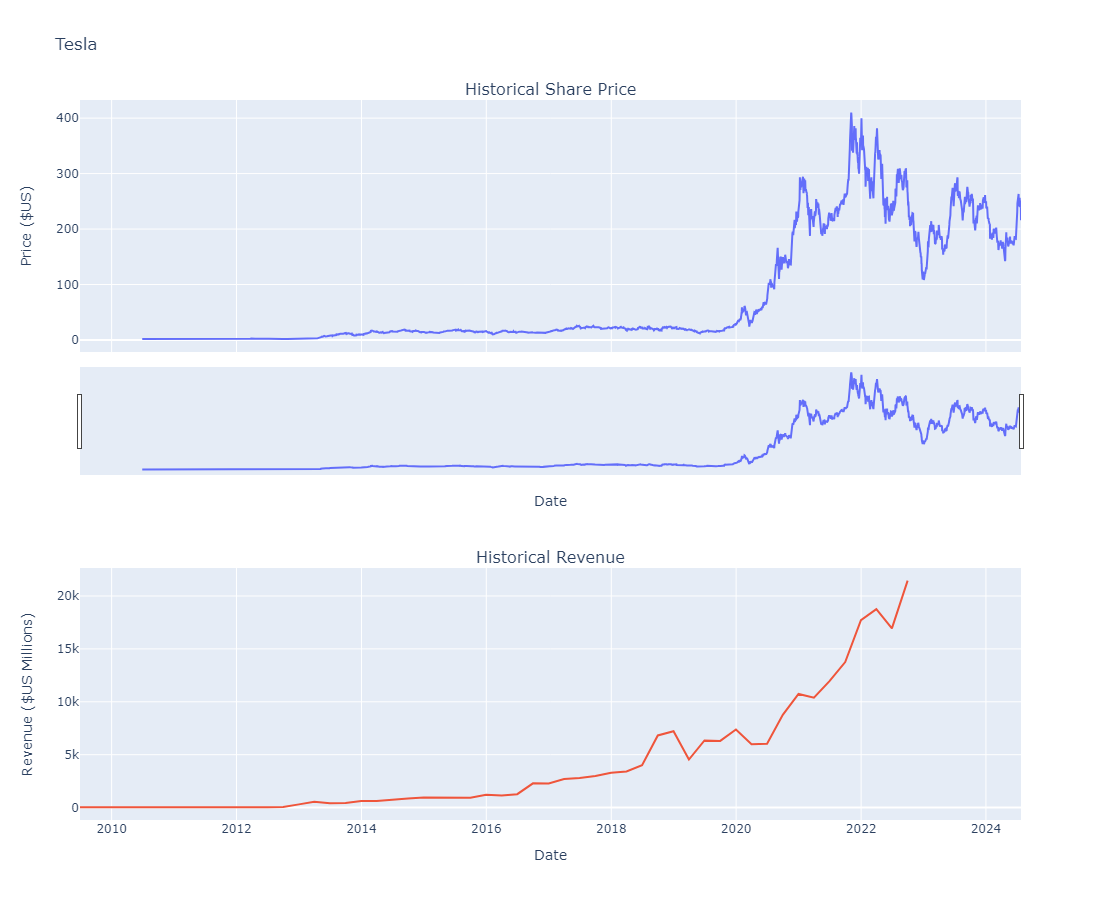

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [40]:
 make_graph(tesla_data, tesla_revenue, 'Tesla')

C:\Users\SRIJANA MISHRA\AppData\Local\Temp\ipykernel_27572\3170617930.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\SRIJANA MISHRA\AppData\Local\Temp\ipykernel_27572\3170617930.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



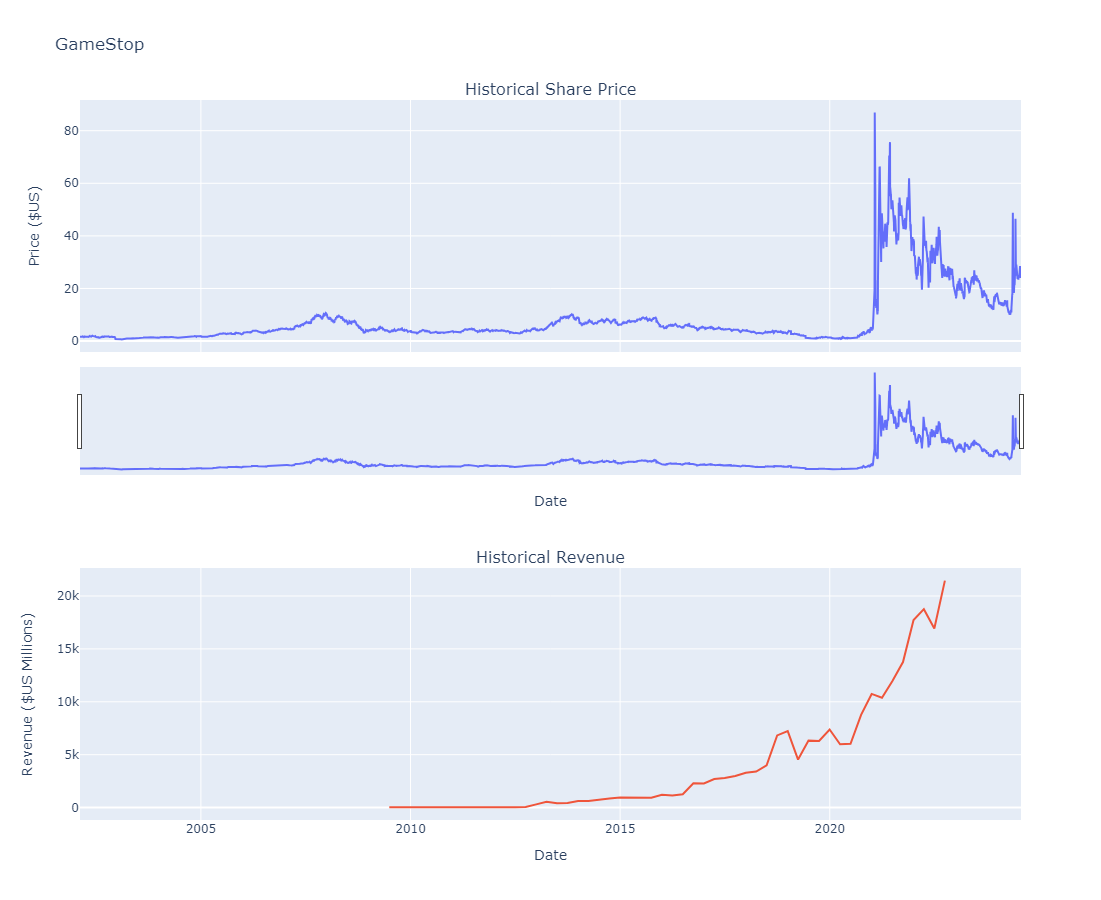

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [44]:
 make_graph(gme_data,gme_revenue, 'GameStop')
    